In [1]:
#packages
import warnings
warnings.filterwarnings("ignore")
import gnssmapper as gm
import copy
import pandas as pd
from pandas import DataFrame
import numpy as np
import geopandas as gpd
import math
from math import cos,sin
import shapely
from shapely import wkt
from shapely.geometry import Point,Polygon,shape
from shapely.geometry import mapping
from datetime import datetime, timedelta
import time
import matplotlib.pyplot as plt
import os

import gnss_process
import sampling

## read data from csv files

In [2]:
daydata = pd.read_csv(r'daydata.csv')
daydata['geometry'] = daydata['geometry'].apply(wkt.loads)
daydata = gpd.GeoDataFrame(daydata, crs='epsg:4979')
daydata = daydata.drop(['Unnamed: 0'],axis=1)
daydata['time'] = pd.to_datetime(daydata['time']) 

In [3]:
daydata.head()

,time,Cn0DbHz,svid,geometry,longitude,latitude
0,2021-08-01 12:55:19,39.627029,G10,POINT Z (109.46418 34.48672 381.00000),109.464181,34.486719
1,2021-08-01 12:55:19,33.723839,C33,POINT Z (109.46418 34.48672 381.00000),109.464181,34.486719
2,2021-08-01 12:55:19,42.963753,C27,POINT Z (109.46418 34.48672 381.00000),109.464181,34.486719
3,2021-08-01 12:55:19,24.468140,C26,POINT Z (109.46418 34.48672 381.00000),109.464181,34.486719
4,2021-08-01 12:55:19,31.295225,C24,POINT Z (109.46418 34.48672 381.00000),109.464181,34.486719


In [4]:
len(daydata)

15050

In [5]:
nightdata = pd.read_csv(r'nightdata.csv')
nightdata['geometry'] = nightdata['geometry'].apply(wkt.loads)
nightdata = gpd.GeoDataFrame(nightdata, crs='epsg:4979')
nightdata = nightdata.drop(['Unnamed: 0'],axis=1)
nightdata['time'] = pd.to_datetime(nightdata['time']) 

In [6]:
nightdata.head()

,time,Cn0DbHz,svid,geometry,longitude,latitude
0,2021-08-03 01:27:07,21.181335,G01,POINT Z (109.46418 34.48666 381.00000),109.464183,34.486662
1,2021-08-03 01:27:07,24.641365,R03,POINT Z (109.46418 34.48666 381.00000),109.464183,34.486662
2,2021-08-03 01:27:07,31.255043,R19,POINT Z (109.46418 34.48666 381.00000),109.464183,34.486662
3,2021-08-03 01:27:07,17.234669,R16,POINT Z (109.46418 34.48666 381.00000),109.464183,34.486662
4,2021-08-03 01:27:07,37.303123,R09,POINT Z (109.46418 34.48666 381.00000),109.464183,34.486662


In [7]:
len(nightdata)

15198

In [8]:
alldata = pd.read_csv(r'alldata.csv')
alldata['geometry'] = alldata['geometry'].apply(wkt.loads)
alldata = gpd.GeoDataFrame(alldata, crs='epsg:4979')
alldata = alldata.drop(['Unnamed: 0'],axis=1)
alldata['time'] = pd.to_datetime(alldata['time']) 

In [9]:
alldata.head()

,time,Cn0DbHz,svid,geometry,longitude,latitude
0,2021-08-01 12:55:19,39.627029,G10,POINT Z (109.46418 34.48672 381.00000),109.464181,34.486719
1,2021-08-01 12:55:19,33.723839,C33,POINT Z (109.46418 34.48672 381.00000),109.464181,34.486719
2,2021-08-01 12:55:19,42.963753,C27,POINT Z (109.46418 34.48672 381.00000),109.464181,34.486719
3,2021-08-01 12:55:19,24.468140,C26,POINT Z (109.46418 34.48672 381.00000),109.464181,34.486719
4,2021-08-01 12:55:19,31.295225,C24,POINT Z (109.46418 34.48672 381.00000),109.464181,34.486719


In [10]:
len(alldata)

30248

In [11]:
#create map of the building
mymap = gpd.read_file('laketower.geojson')
#define the height of building is zero
mymap['height'] = 0

## 3.3 sampling by distance

## 3.3.1 by distance interval

In [12]:
time_start=time.time()
daydata = sampling.distance_list(daydata,mymap)
time_end=time.time()
print('run time is: ',time_end-time_start)

run time is:  9.89015817642212


In [13]:
daydata.head()

,index,time,Cn0DbHz,svid,geometry,longitude,latitude,index,distance
0,0,2021-08-01 12:55:19,39.627029,G10,POINT Z (109.46418 34.48672 381.00000),109.464181,34.486719,0,17.0
1,1,2021-08-01 12:55:19,33.723839,C33,POINT Z (109.46418 34.48672 381.00000),109.464181,34.486719,1,17.0
2,2,2021-08-01 12:55:19,42.963753,C27,POINT Z (109.46418 34.48672 381.00000),109.464181,34.486719,2,17.0
3,3,2021-08-01 12:55:19,24.468140,C26,POINT Z (109.46418 34.48672 381.00000),109.464181,34.486719,3,17.0
4,4,2021-08-01 12:55:19,31.295225,C24,POINT Z (109.46418 34.48672 381.00000),109.464181,34.486719,4,17.0


In [14]:
sorted(daydata['distance'].unique())

[11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0]

In [15]:
len(daydata)

15050

In [16]:
time_start=time.time()
nightdata = sampling.distance_list(nightdata,mymap)
time_end=time.time()
print('run time is: ',time_end-time_start)

alldata = pd.concat([daydata,nightdata])

run time is:  9.592936277389526


In [17]:
nightdata.head()

,index,time,Cn0DbHz,svid,geometry,longitude,latitude,index,distance
0,0,2021-08-03 01:27:07,21.181335,G01,POINT Z (109.46418 34.48666 381.00000),109.464183,34.486662,0,14.0
1,1,2021-08-03 01:27:07,24.641365,R03,POINT Z (109.46418 34.48666 381.00000),109.464183,34.486662,1,14.0
2,2,2021-08-03 01:27:07,31.255043,R19,POINT Z (109.46418 34.48666 381.00000),109.464183,34.486662,2,14.0
3,3,2021-08-03 01:27:07,17.234669,R16,POINT Z (109.46418 34.48666 381.00000),109.464183,34.486662,3,14.0
4,4,2021-08-03 01:27:07,37.303123,R09,POINT Z (109.46418 34.48666 381.00000),109.464183,34.486662,4,14.0


In [18]:
sorted(nightdata['distance'].unique())

[9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0]

In [19]:
len(nightdata)

15198

In [20]:
alldata.head()

,index,time,Cn0DbHz,svid,geometry,longitude,latitude,index,distance
0,0,2021-08-01 12:55:19,39.627029,G10,POINT Z (109.46418 34.48672 381.00000),109.464181,34.486719,0,17.0
1,1,2021-08-01 12:55:19,33.723839,C33,POINT Z (109.46418 34.48672 381.00000),109.464181,34.486719,1,17.0
2,2,2021-08-01 12:55:19,42.963753,C27,POINT Z (109.46418 34.48672 381.00000),109.464181,34.486719,2,17.0
3,3,2021-08-01 12:55:19,24.468140,C26,POINT Z (109.46418 34.48672 381.00000),109.464181,34.486719,3,17.0
4,4,2021-08-01 12:55:19,31.295225,C24,POINT Z (109.46418 34.48672 381.00000),109.464181,34.486719,4,17.0


In [21]:
day_distances = []
day_ob = []
day_height = []
time_start=time.time()
for i in range(1,30):
    day_distances.append(sampling.distance_circles(daydata,i))
time_end=time.time()
print('run time is: ',time_end-time_start)

run time is:  2.853569746017456


In [22]:
for j in range(29):
    day_ob.append(gm.observe(day_distances[j]))
    day_height.append(gm.predict(mymap,day_ob[j].sort_values(by = ['Cn0DbHz'])))

In [23]:
day_height

[   lower_bound   mid_point  upper_bound
 0   434.833114  434.978428   435.123742,
    lower_bound   mid_point  upper_bound
 0   474.444034  475.823548   477.203062,
    lower_bound   mid_point  upper_bound
 0   420.361144  420.445811   420.530479,
    lower_bound   mid_point  upper_bound
 0    453.29484  453.877198   454.459557,
    lower_bound   mid_point  upper_bound
 0   473.513434  476.736922    479.96041,
    lower_bound   mid_point  upper_bound
 0   466.959482  472.272747   477.586011,
    lower_bound  mid_point  upper_bound
 0   436.090131  436.22604   436.361948,
    lower_bound   mid_point  upper_bound
 0   421.569984  421.853385   422.136785,
    lower_bound   mid_point  upper_bound
 0   597.282024  603.807069   610.332114,
    lower_bound   mid_point  upper_bound
 0   424.255573  424.403793   424.552014,
    lower_bound   mid_point  upper_bound
 0   429.582353  429.785029   429.987704,
    lower_bound   mid_point  upper_bound
 0   454.251073  455.104026   455.956979,
    lo

In [24]:
len(day_height)

29

In [25]:
night_distances = []
night_ob = []
night_height = []
time_start=time.time()
for i in range(1,30):
    night_distances.append(sampling.distance_circles(nightdata,i))
time_end=time.time()
print('run time is: ',time_end-time_start)

run time is:  3.65242600440979


In [26]:
for j in range(29):
    night_ob.append(gm.observe(night_distances[j]))
    night_height.append(gm.predict(mymap,night_ob[j].sort_values(by = ['Cn0DbHz'])))

In [27]:
night_height

[   lower_bound   mid_point  upper_bound
 0   418.400916  418.539396   418.677875,
    lower_bound   mid_point  upper_bound
 0   390.289073  390.304073   390.319073,
    lower_bound   mid_point  upper_bound
 0   445.730574  445.918268   446.105961,
    lower_bound   mid_point  upper_bound
 0   470.008784  471.333134   472.657483,
    lower_bound   mid_point  upper_bound
 0   424.702398  424.797857   424.893317,
    lower_bound   mid_point  upper_bound
 0   389.204508  389.219508   389.234508,
    lower_bound   mid_point  upper_bound
 0   427.291747  427.456289    427.62083,
    lower_bound   mid_point  upper_bound
 0   441.101456  442.457259   443.813061,
    lower_bound   mid_point  upper_bound
 0   423.577736  423.723018   423.868299,
    lower_bound   mid_point  upper_bound
 0   419.734047  419.981359   420.228671,
    lower_bound   mid_point  upper_bound
 0   416.434621  416.697777   416.960933,
    lower_bound   mid_point  upper_bound
 0   391.860259  391.875259   391.890259,
    

In [28]:
len(alldata['distance'].unique())

33

In [29]:
sorted(alldata['distance'].unique())

[9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0]

In [30]:
all_distances = []
all_ob = []
all_height = []
time_start=time.time()
for i in range(1,30):
    all_distances.append(sampling.distance_circles(alldata,i))
time_end=time.time()
print('run time is: ',time_end-time_start)

run time is:  2.985053062438965


In [31]:
for j in range(2):
    all_ob.append(night_ob[j])
    all_height.append(night_height[j])

In [32]:
for j in range(2,23):
    all_ob.append(pd.concat([day_ob[j-2],night_ob[j]]))
    all_height.append(gm.predict(mymap,all_ob[j].sort_values(by = ['Cn0DbHz'])))

In [33]:
for j in range(23,27):
    all_ob.append(night_ob[j])
    all_height.append(night_height[j])

In [34]:
for j in range(27,29):
    all_ob.append(pd.concat([day_ob[j-6],night_ob[j]]))
    all_height.append(gm.predict(mymap,all_ob[j].sort_values(by = ['Cn0DbHz'])))

In [35]:
len(all_height)

29

In [36]:
all_height

[   lower_bound   mid_point  upper_bound
 0   418.400916  418.539396   418.677875,
    lower_bound   mid_point  upper_bound
 0   390.289073  390.304073   390.319073,
    lower_bound   mid_point  upper_bound
 0    434.54303  434.693432   434.843834,
    lower_bound   mid_point  upper_bound
 0   470.517878  470.845596   471.173314,
    lower_bound   mid_point  upper_bound
 0   452.115422  452.471473   452.827525,
    lower_bound   mid_point  upper_bound
 0   417.404601  417.506916   417.609232,
    lower_bound   mid_point  upper_bound
 0   558.087067  567.086895   576.086722,
    lower_bound   mid_point  upper_bound
 0   437.622698  437.770567   437.918436,
    lower_bound   mid_point  upper_bound
 0   451.516395  451.678382    451.84037,
    lower_bound   mid_point  upper_bound
 0   421.427816  421.625527   421.823238,
    lower_bound   mid_point  upper_bound
 0   424.165985  424.273712   424.381438,
    lower_bound   mid_point  upper_bound
 0   472.275495  475.134438    477.99338,
    

In [37]:
day_height = sampling.combine_height(day_height)
night_height = sampling.combine_height(night_height)
all_height = sampling.combine_height(all_height)

In [69]:
distanceday = [i for i in range(int(daydata['distance'].unique().min()),int(daydata['distance'].unique().min())+29)]
distancenight = [i for i in range(int(nightdata['distance'].unique().min()),int(nightdata['distance'].unique().min())+29)]
distanceall = [i for i in range(int(alldata['distance'].unique().min()),int(alldata['distance'].unique().min())+29)]

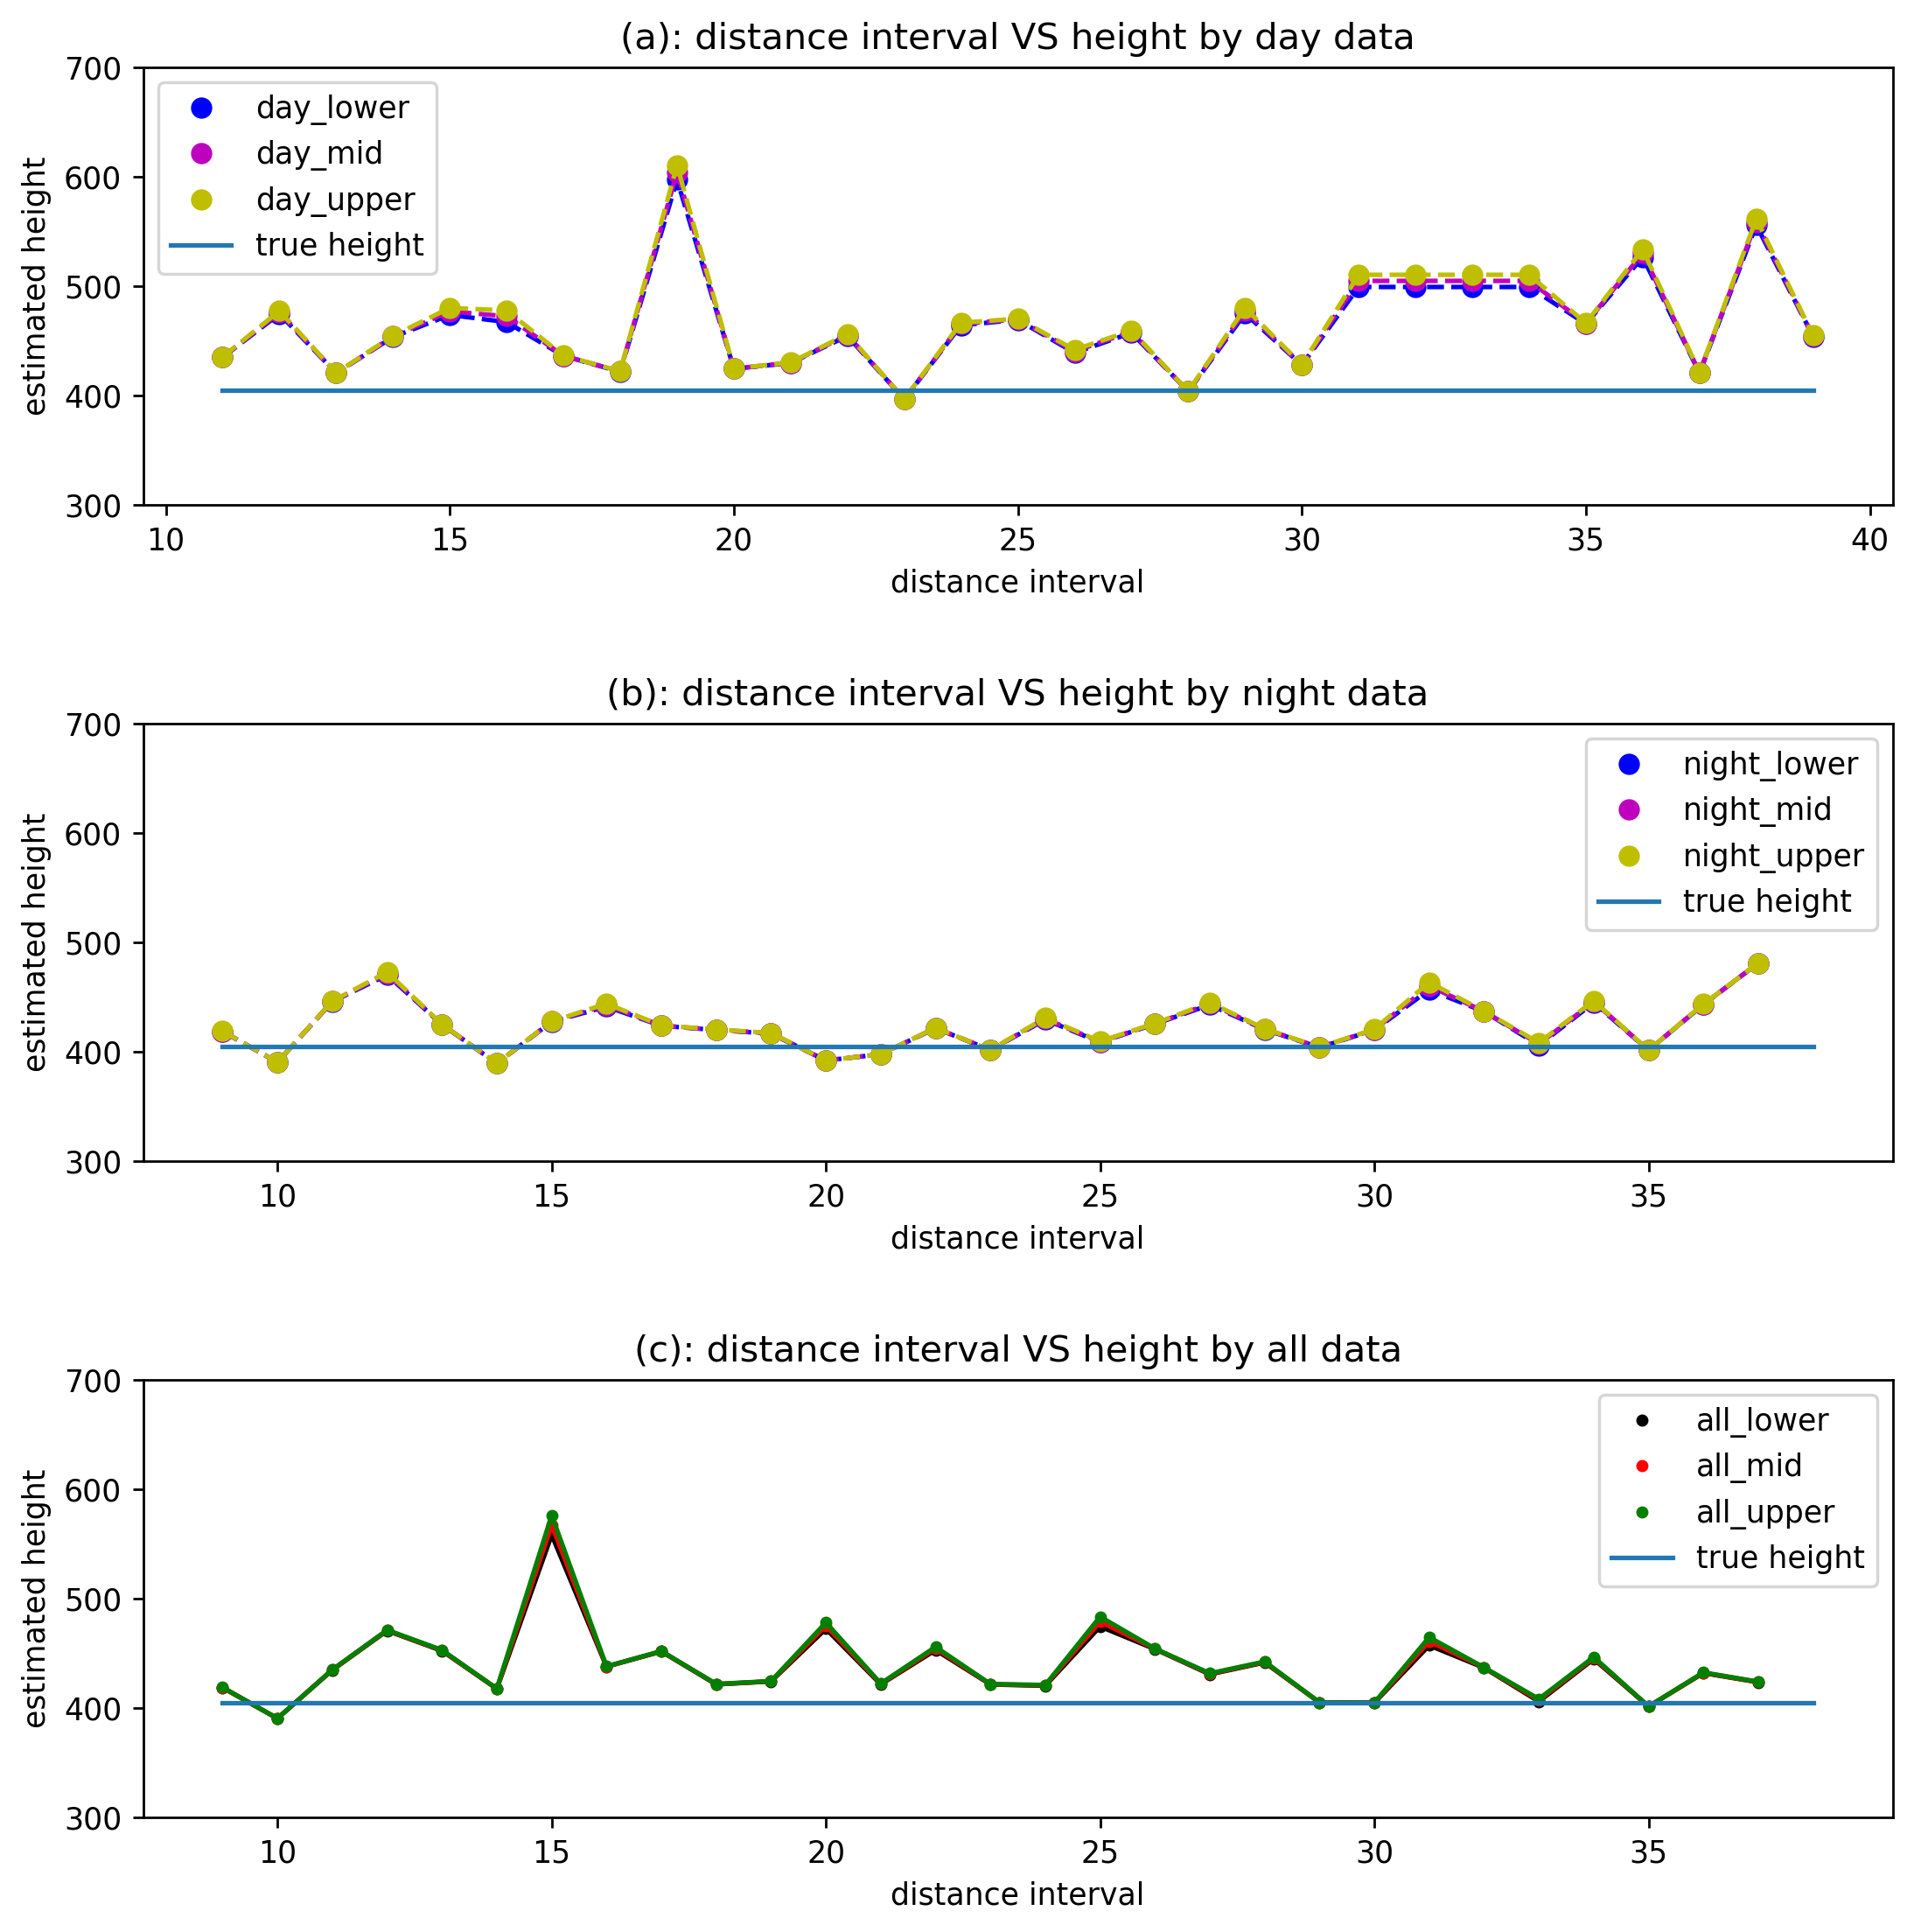

In [95]:
fig = plt.figure(1,(10,10),dpi = 250)   
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9,
               wspace=0.5, hspace=0.5)

#day height data
ax = plt.subplot(311)
plt.sca(ax)
plt.plot(distanceday,day_height['lower_bound'],'b--')
plt.plot(distanceday,day_height['lower_bound'],'bo',label='day_lower')
plt.plot(distanceday,day_height['mid_point'],'m--')
plt.plot(distanceday,day_height['mid_point'],'mo',label='day_mid')
plt.plot(distanceday,day_height['upper_bound'],'y--')
plt.plot(distanceday,day_height['upper_bound'],'yo',label='day_upper')
plt.plot([11,39],[405,405], alpha=3,label = 'true height')
plt.title('(a): distance interval VS height by day data')
plt.ylim(300,700)
plt.ylabel('estimated height')
plt.xlabel('distance interval')
plt.legend()

#night height data
ax = plt.subplot(312)
plt.sca(ax)
plt.plot(distancenight,night_height['lower_bound'],'b--')
plt.plot(distancenight,night_height['lower_bound'],'bo',label='night_lower')
plt.plot(distancenight,night_height['mid_point'],'m--')
plt.plot(distancenight,night_height['mid_point'],'mo',label='night_mid')
plt.plot(distancenight,night_height['upper_bound'],'y--')
plt.plot(distancenight,night_height['upper_bound'],'yo',label='night_upper')
plt.plot([9,38],[405,405], alpha=3,label = 'true height')
plt.title('(b): distance interval VS height by night data')
plt.ylim(300,700)
plt.ylabel('estimated height')
plt.xlabel('distance interval')
plt.legend()

#all data
ax = plt.subplot(313)
plt.sca(ax)
plt.plot(distanceall,all_height['lower_bound'],'k-')
plt.plot(distanceall,all_height['lower_bound'],'k.',label='all_lower')
plt.plot(distanceall,all_height['mid_point'],'r-')
plt.plot(distanceall,all_height['mid_point'],'r.',label='all_mid')
plt.plot(distanceall,all_height['upper_bound'],'g-')
plt.plot(distanceall,all_height['upper_bound'],'g.',label='all_upper')
plt.plot([9,38],[405,405], alpha=3,label = 'true height')
plt.title('(c): distance interval VS height by all data')
plt.ylim(300,700)
plt.ylabel('estimated height')
plt.xlabel('distance interval')
plt.legend()
plt.savefig('distance_interval.jpg')
plt.show()

In [110]:
distanceinst = [i for i in range(11,37)]

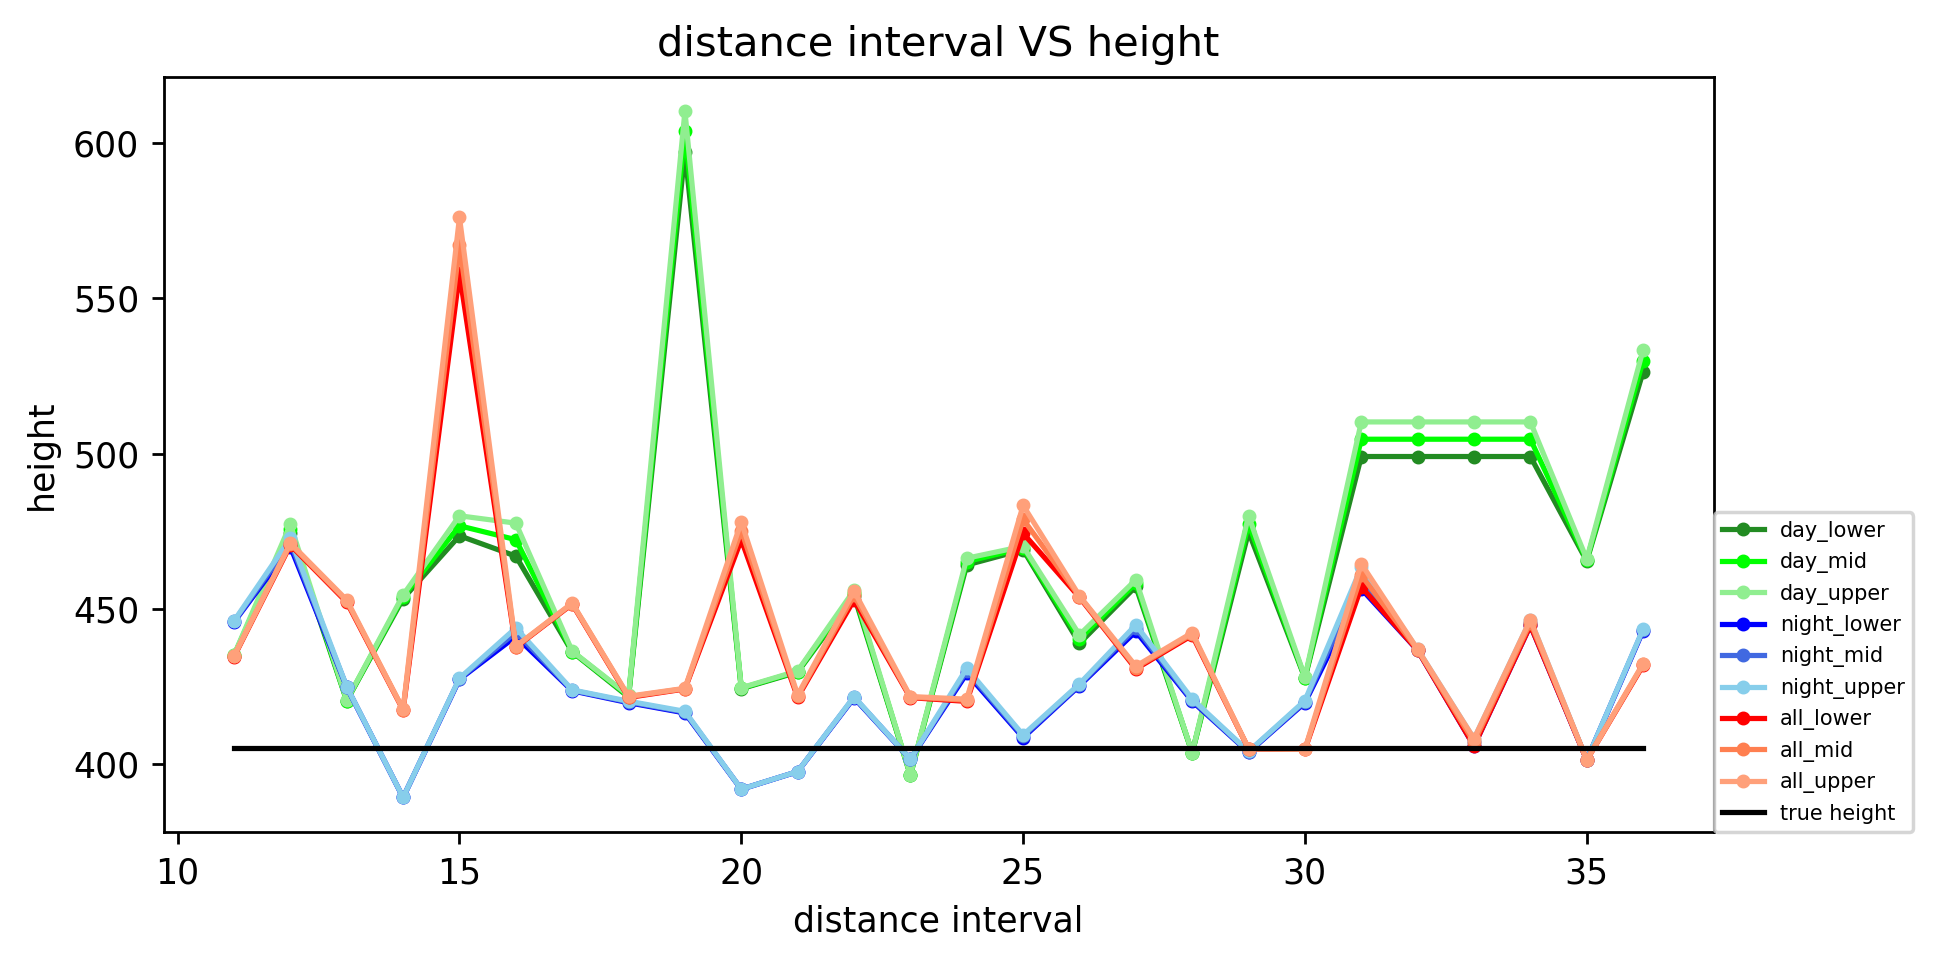

In [133]:
fig = plt.figure(1,(8,4),dpi = 250)    
ax = plt.subplot(111)
plt.sca(ax)


plt.plot(distanceinst,day_height[0:26]['lower_bound'],color='forestgreen',marker = '.',label='day_lower')
plt.plot(distanceinst,day_height[0:26]['mid_point'],color='lime',marker = '.',label='day_mid')
plt.plot(distanceinst,day_height[0:26]['upper_bound'],color='lightgreen',marker = '.',label='day_upper')

plt.plot(distanceinst,night_height[2:28]['lower_bound'],color='blue',marker = '.',label='night_lower')
plt.plot(distanceinst,night_height[2:28]['mid_point'],color='royalblue',marker = '.',label='night_mid')
plt.plot(distanceinst,night_height[2:28]['upper_bound'],color='skyblue',marker='.',label='night_upper')

plt.plot(distanceinst,all_height[2:28]['lower_bound'],color='red',marker = '.',label='all_lower')
plt.plot(distanceinst,all_height[2:28]['mid_point'],color='coral',marker = '.',label='all_mid')
plt.plot(distanceinst,all_height[2:28]['upper_bound'],color='lightsalmon',marker = '.',label='all_upper')

plt.plot([11,36],[405,405], color='k',label = 'true height')

plt.title('distance interval VS height')

plt.ylabel('height')
plt.xlabel('distance interval')
num1=1.0
num2 = 0
num3=3
num4=0
plt.legend(fontsize=6,bbox_to_anchor=(num1, num2), loc=num3, borderaxespad=num4)
plt.savefig('distance_interval_one.jpg')
plt.show()

## 3.3.2 by distance buffer

In [139]:
daybuffer = []
bufferlist = [0.00001,0.00003,0.00005,0.00008,0.0001,0.0002]
time_start=time.time()
for i in range (len(bufferlist)):
    daybuffer.append(sampling.buffer(daydata,mymap,bufferlist[i]))
time_end=time.time()
print('run time is: ',time_end-time_start)

run time is:  406.138680934906


In [140]:
nightbuffer = []
bufferlist = [0.00001,0.00003,0.00005,0.00008,0.0001,0.0002]
time_start=time.time()
for i in range (len(bufferlist)):
    nightbuffer.append(sampling.buffer(nightdata,mymap,bufferlist[i]))
time_end=time.time()
print('run time is: ',time_end-time_start)

run time is:  423.6318619251251


In [142]:
allbuffer = []

for i in range (len(bufferlist)):
    allbuffer.append(pd.concat([daybuffer[i],nightbuffer[i]]))

In [143]:
len(allbuffer)

6

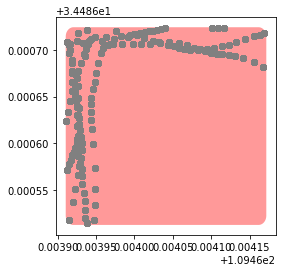

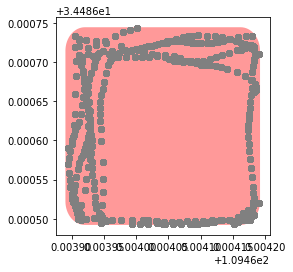

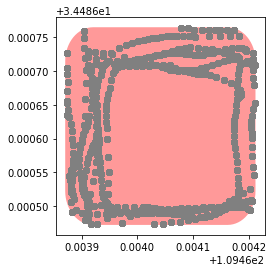

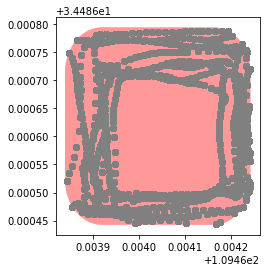

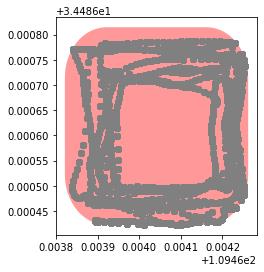

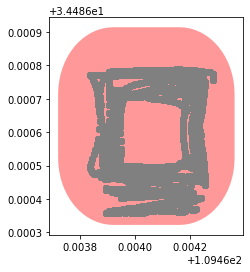

In [146]:
#validate the buffer process
for i in range (len(bufferlist)):
    ax = mymap.geometry.buffer(bufferlist[i]).plot(color='red', alpha=0.4)
    ax = allbuffer[i].plot(color='grey', alpha=0.4, ax=ax)
    

In [148]:
daybufferob = []
daybufferh = []
for i in range (len(bufferlist)):
    daybufferob.append(gm.observe(daybuffer[i]))
    daybufferh.append(gm.predict(mymap,daybufferob[i].sort_values(by = ['Cn0DbHz'])))

In [149]:
nightbufferob = []
nightbufferh = []
for i in range (len(bufferlist)):
    nightbufferob.append(gm.observe(nightbuffer[i]))
    nightbufferh.append(gm.predict(mymap,nightbufferob[i].sort_values(by = ['Cn0DbHz'])))

In [150]:
allbufferob = []
allbufferh = []
for i in range (len(bufferlist)):
    allbufferob.append(pd.concat([daybufferob[i],nightbufferob[i]]))
    allbufferh.append(gm.predict(mymap,allbufferob[i].sort_values(by = ['Cn0DbHz'])))

In [151]:
daybufferh = sampling.combine_height(daybufferh)
nightbufferh = sampling.combine_height(nightbufferh)
allbufferh = sampling.combine_height(allbufferh)

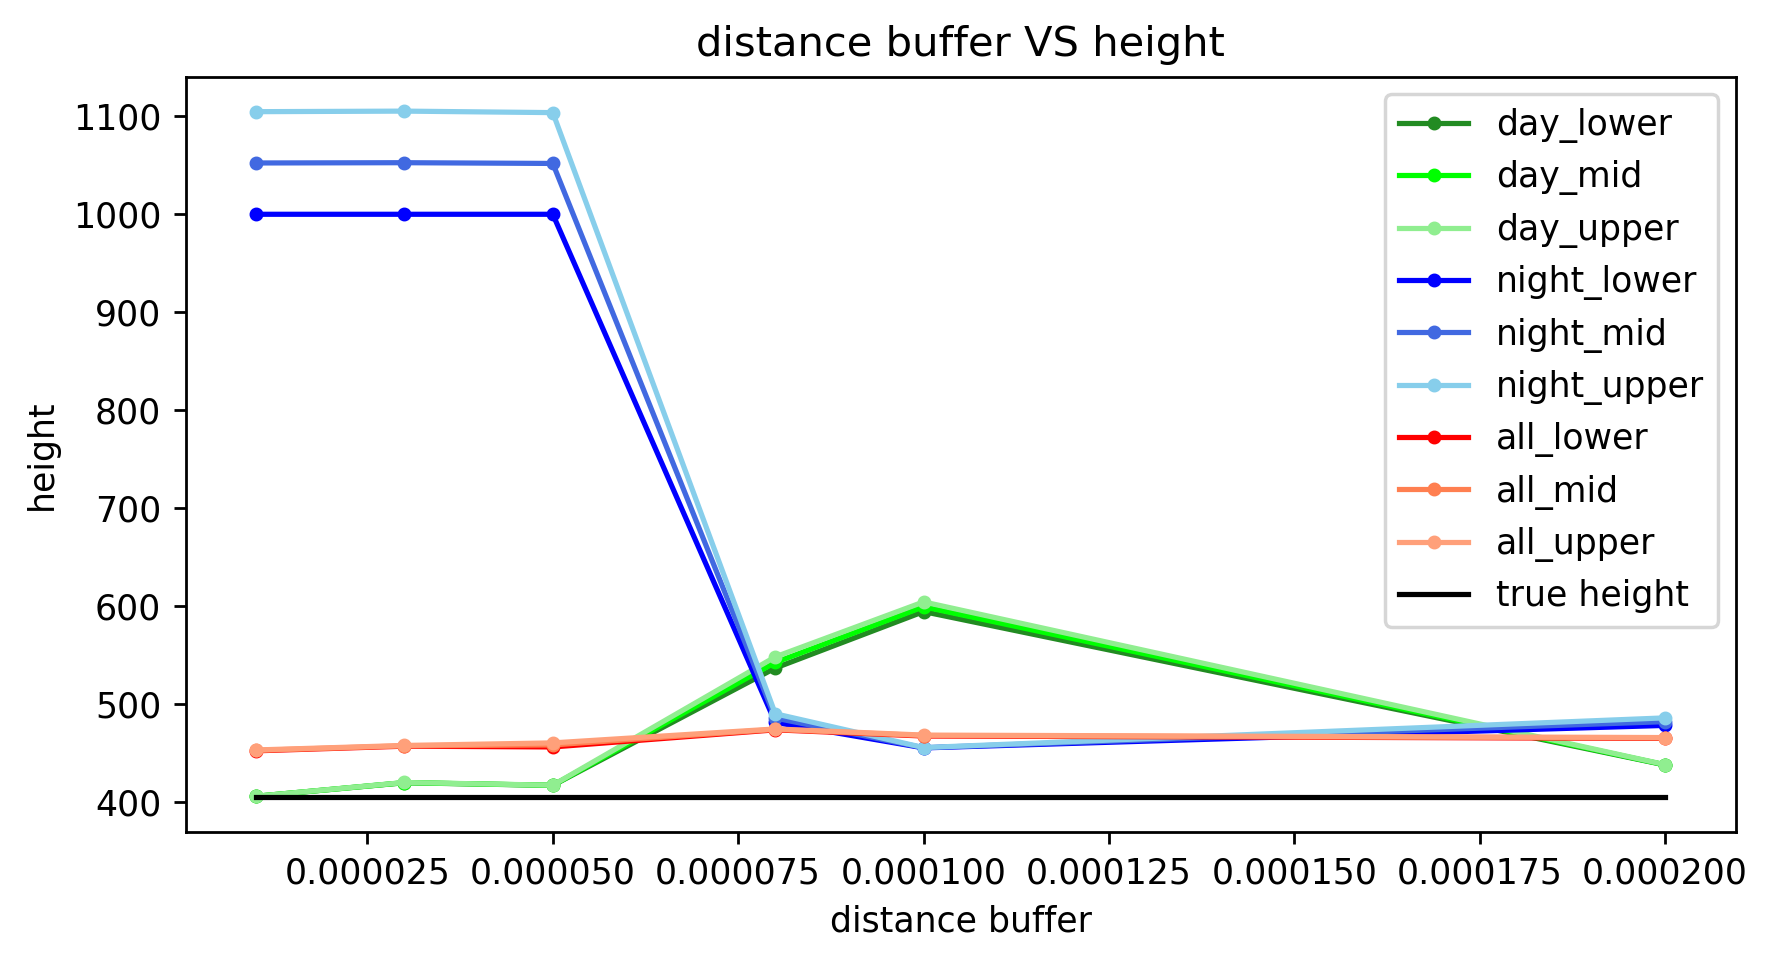

In [163]:
fig = plt.figure(1,(8,4),dpi = 250)    
ax = plt.subplot(111)
plt.sca(ax)


plt.plot(bufferlist,daybufferh['lower_bound'],color='forestgreen',marker = '.',label='day_lower')
plt.plot(bufferlist,daybufferh['mid_point'],color='lime',marker = '.',label='day_mid')
plt.plot(bufferlist,daybufferh['upper_bound'],color='lightgreen',marker = '.',label='day_upper')

plt.plot(bufferlist,nightbufferh['lower_bound'],color='blue',marker = '.',label='night_lower')
plt.plot(bufferlist,nightbufferh['mid_point'],color='royalblue',marker = '.',label='night_mid')
plt.plot(bufferlist,nightbufferh['upper_bound'],color='skyblue',marker='.',label='night_upper')

plt.plot(bufferlist,allbufferh['lower_bound'],color='red',marker = '.',label='all_lower')
plt.plot(bufferlist,allbufferh['mid_point'],color='coral',marker = '.',label='all_mid')
plt.plot(bufferlist,allbufferh['upper_bound'],color='lightsalmon',marker = '.',label='all_upper')

plt.plot([0.00001,0.0002],[405,405], color='k',label = 'true height')

plt.title('distance buffer VS height')
plt.ylabel('height')
plt.xlabel('distance buffer')
plt.legend()
plt.savefig('distance_buffer.jpg')
plt.show()

## 3.4 sampling by time interval

In [164]:
day_time = []
time_start=time.time()
for i in range(1,30):
    day_time.append(sampling.time_interval(daydata,i))
time_end=time.time()
print('run time is: ',time_end-time_start)

run time is:  35.47327208518982


In [166]:
day_time[0].head()

,time,svid,Cn0DbHz,geometry,minute,minite_diff
0,2021-08-01 12:55:19,G10,39.627029,POINT Z (109.46418 34.48672 381.00000),775,0
21,2021-08-01 12:55:19,G25,38.063278,POINT Z (109.46418 34.48672 381.00000),775,0
20,2021-08-01 12:55:19,R10,29.850615,POINT Z (109.46418 34.48672 381.00000),775,0
19,2021-08-01 12:55:19,G32,40.228897,POINT Z (109.46418 34.48672 381.00000),775,0
18,2021-08-01 12:55:19,G31,7.000000,POINT Z (109.46418 34.48672 381.00000),775,0


In [168]:
night_time = []
night_ob = []
night_height = []
time_start=time.time()
for i in range(1,30):
    night_time.append(sampling.time_interval(nightdata,i))
time_end=time.time()
print('run time is: ',time_end-time_start)

run time is:  33.69887328147888


In [169]:
night_time[0].head()

,time,svid,Cn0DbHz,geometry,minute,minite_diff
0,2021-08-03 01:27:07,G01,21.181335,POINT Z (109.46418 34.48666 381.00000),87,0
17,2021-08-03 01:27:07,G17,40.364914,POINT Z (109.46418 34.48666 381.00000),87,0
16,2021-08-03 01:27:07,G22,35.072334,POINT Z (109.46418 34.48666 381.00000),87,0
15,2021-08-03 01:27:07,G21,32.716965,POINT Z (109.46418 34.48666 381.00000),87,0
14,2021-08-03 01:27:07,G19,44.719227,POINT Z (109.46418 34.48666 381.00000),87,0


In [171]:
len(night_time)

29

In [173]:
all_time = []
all_ob = []
all_height = []

for i in range(29):
    all_time.append(pd.concat([day_time[i],night_time[i]]))

In [174]:
len(all_time)

29

In [177]:
day_ob = []
day_height = []
for i in range(29):
    day_ob.append(gm.observe(day_time[i]))
    day_height.append(gm.predict(mymap,day_ob[i].sort_values(by = ['Cn0DbHz'])))

In [178]:
night_ob=[]
night_height=[]
for i in range(29):
    night_ob.append(gm.observe(night_time[i]))
    night_height.append(gm.predict(mymap,night_ob[i].sort_values(by = ['Cn0DbHz'])))

In [180]:
for i in range(29):
    all_ob.append(pd.concat([day_ob[i],night_ob[i]]))
    all_height.append(gm.predict(mymap,all_ob[i].sort_values(by = ['Cn0DbHz'])))

In [181]:
day_height = sampling.combine_height(day_height)
night_height = sampling.combine_height(night_height)
all_height = sampling.combine_height(all_height)

In [186]:
timelist = [i for i in range(1,30)]

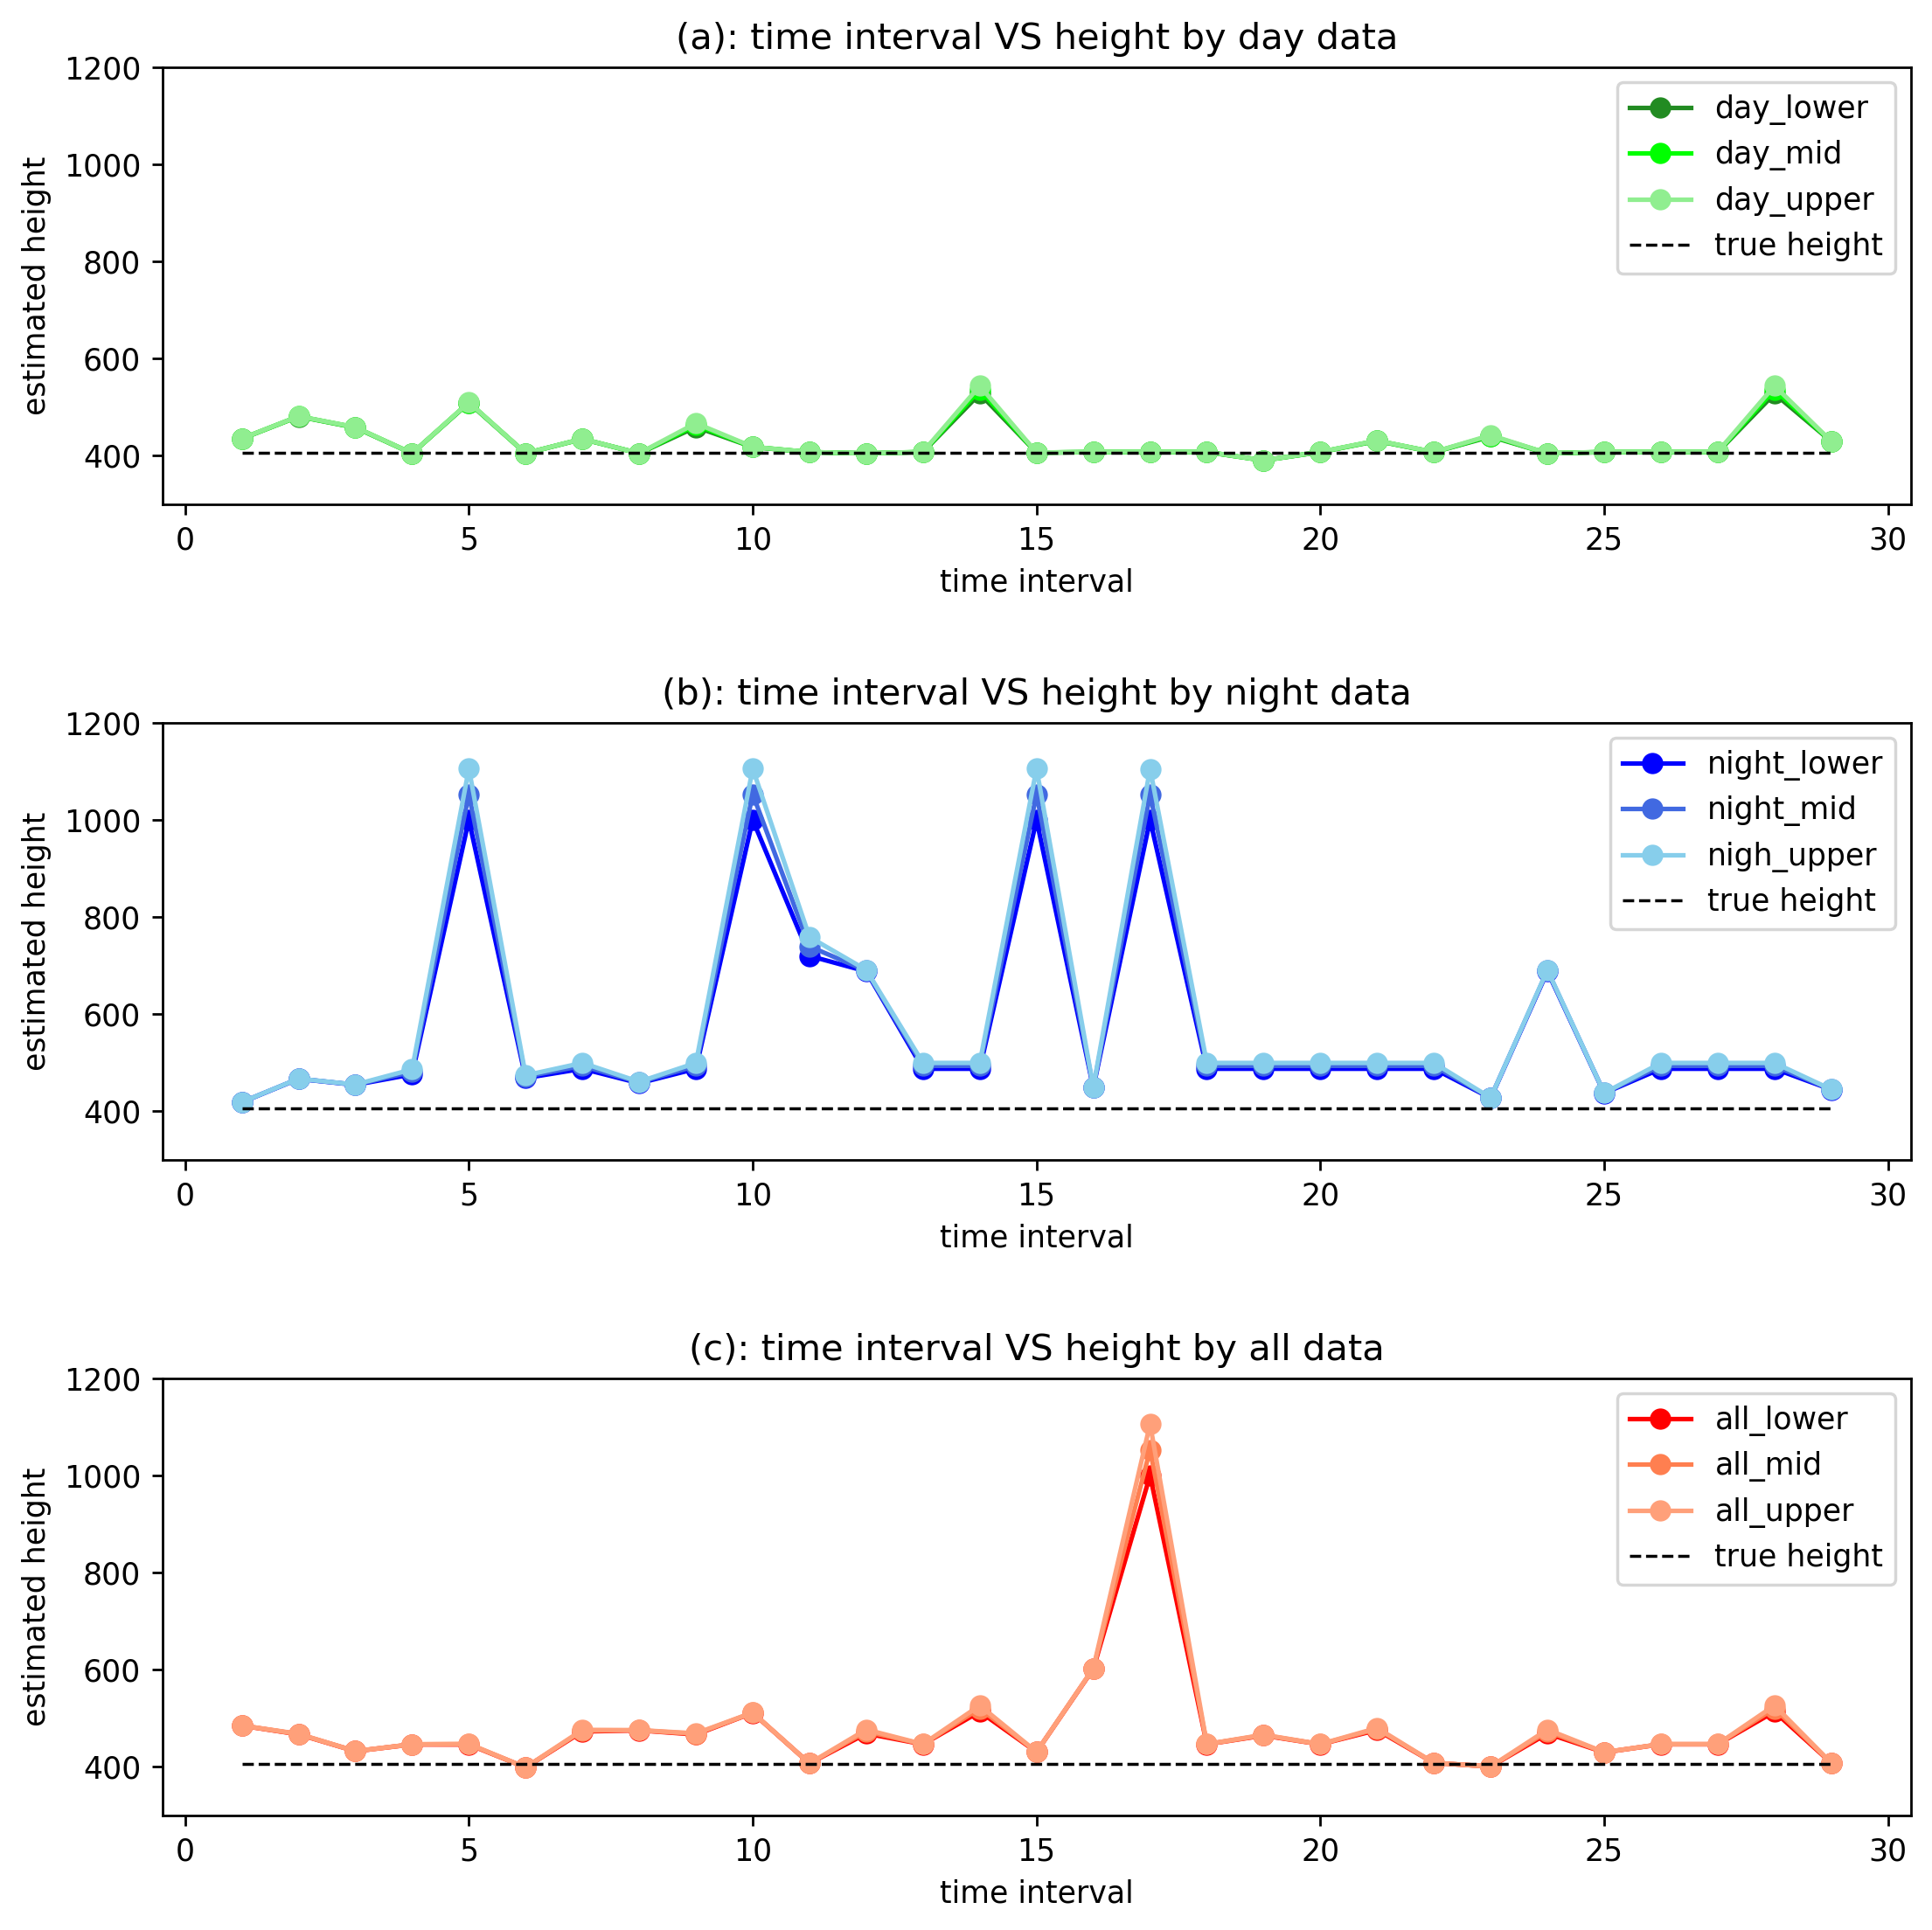

In [208]:
fig = plt.figure(1,(10,10),dpi = 250)   
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9,
               wspace=0.5, hspace=0.5)

#day height data
ax = plt.subplot(311)
plt.sca(ax)
plt.plot(timelist,day_height['lower_bound'],color='forestgreen',marker = 'o',label='day_lower')
plt.plot(timelist,day_height['mid_point'],color='lime',marker = 'o',label='day_mid')
plt.plot(timelist,day_height['upper_bound'],color='lightgreen',marker = 'o',label='day_upper')
plt.plot([1,29],[405,405], 'k--',label = 'true height',linewidth = '1')
plt.title('(a): time interval VS height by day data')
plt.ylim(300,1200)
plt.ylabel('estimated height')
plt.xlabel('time interval')
plt.legend()

#night height data
ax = plt.subplot(312)
plt.sca(ax)
plt.plot(timelist,night_height['lower_bound'],color='blue',marker = 'o',label='night_lower')
plt.plot(timelist,night_height['mid_point'],color='royalblue',marker = 'o',label='night_mid')
plt.plot(timelist,night_height['upper_bound'],color='skyblue',marker='o',label='nigh_upper')
plt.plot([1,29],[405,405], 'k--',label = 'true height',linewidth = '1')
plt.title('(b): time interval VS height by night data')
plt.ylim(300,1200)
plt.ylabel('estimated height')
plt.xlabel('time interval')
plt.legend()

#all data
ax = plt.subplot(313)
plt.sca(ax)
plt.plot(timelist,all_height['lower_bound'],color='red',marker = 'o',label='all_lower')
plt.plot(timelist,all_height['mid_point'],color='coral',marker = 'o',label='all_mid')
plt.plot(timelist,all_height['upper_bound'],color='lightsalmon',marker = 'o',label='all_upper')
plt.plot([1,29],[405,405], 'k--',label = 'true height',linewidth = '1')
plt.title('(c): time interval VS height by all data')
plt.ylim(300,1200)
plt.ylabel('estimated height')
plt.xlabel('time interval')
plt.legend()
plt.savefig('time_interval.jpg')
plt.show()

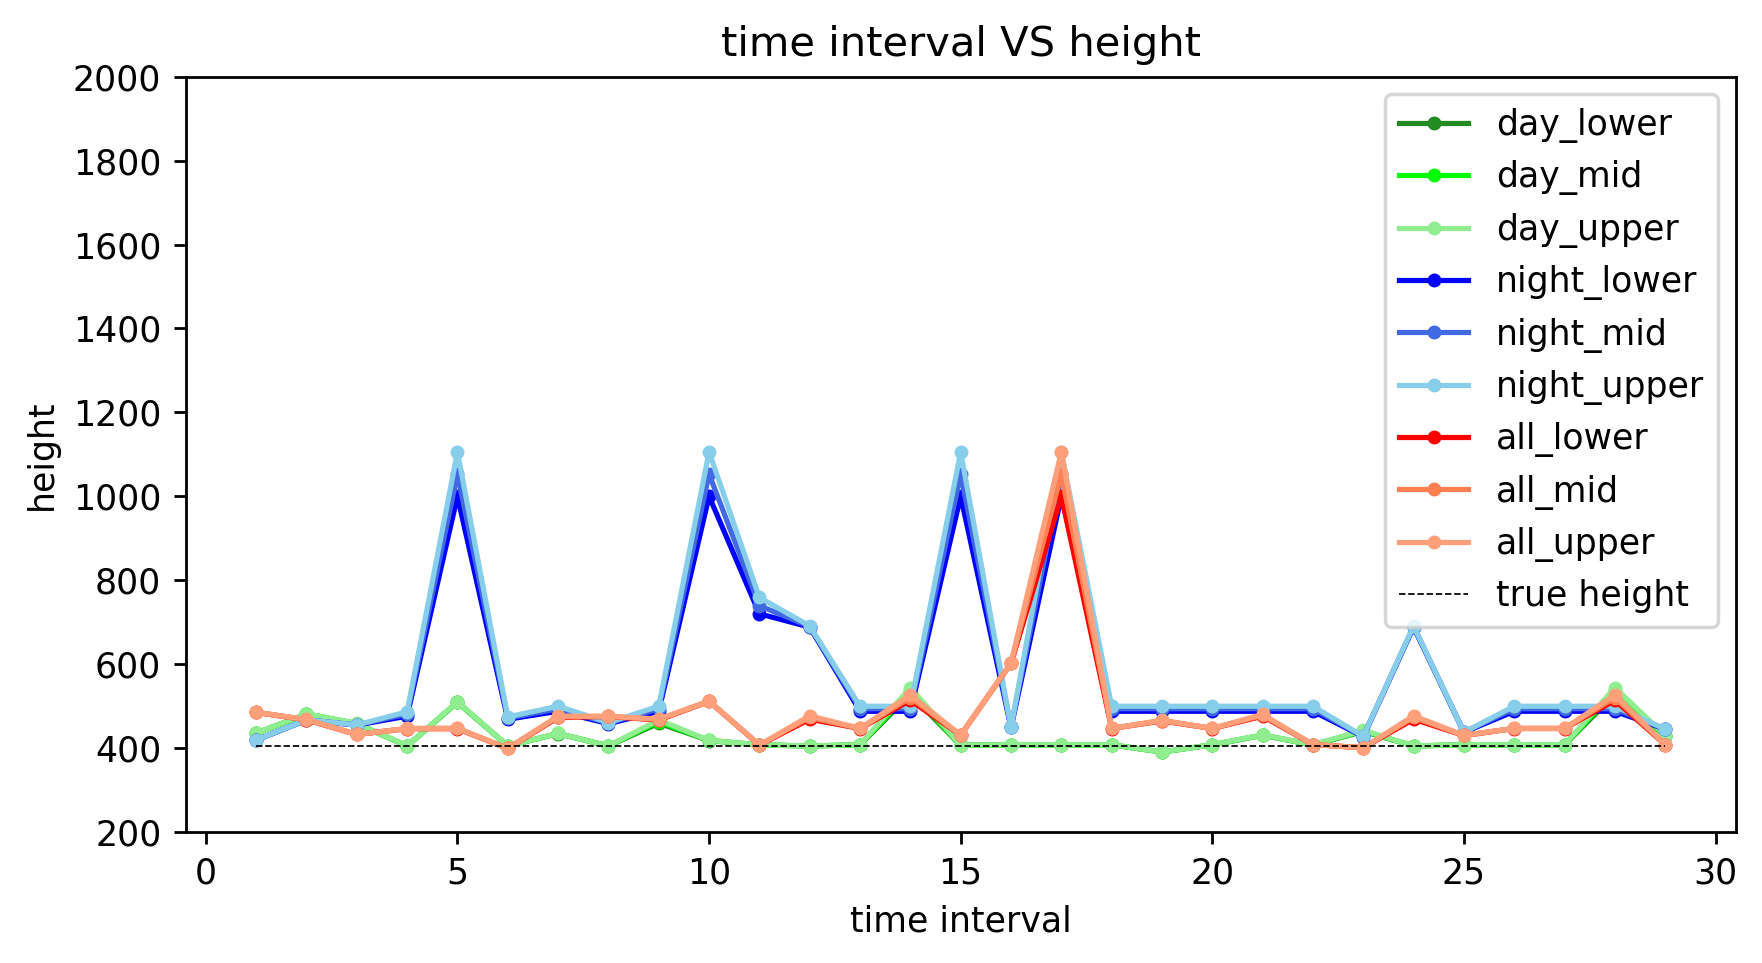

In [219]:
fig = plt.figure(1,(8,4),dpi = 250)    
ax = plt.subplot(111)
plt.sca(ax)


plt.plot(timelist,day_height['lower_bound'],color='forestgreen',marker = '.',label='day_lower')
plt.plot(timelist,day_height['mid_point'],color='lime',marker = '.',label='day_mid')
plt.plot(timelist,day_height['upper_bound'],color='lightgreen',marker = '.',label='day_upper')

plt.plot(timelist,night_height['lower_bound'],color='blue',marker = '.',label='night_lower')
plt.plot(timelist,night_height['mid_point'],color='royalblue',marker = '.',label='night_mid')
plt.plot(timelist,night_height['upper_bound'],color='skyblue',marker='.',label='night_upper')

plt.plot(timelist,all_height['lower_bound'],color='red',marker = '.',label='all_lower')
plt.plot(timelist,all_height['mid_point'],color='coral',marker = '.',label='all_mid')
plt.plot(timelist,all_height['upper_bound'],color='lightsalmon',marker = '.',label='all_upper')

plt.plot([1,29],[405,405], 'k--',label = 'true height',linewidth = '0.5')

plt.title('time interval VS height')
plt.ylabel('height')
plt.xlabel('time interval')
plt.legend()
plt.ylim(200,2000)
plt.savefig('time_one.jpg')
plt.show()